In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch

In [2]:
df = pd.read_excel(
    'Data/big_chungus.xlsx', 
    index_col=None, 
    header=0,
)
print(df.shape)
df.head()

(49972, 4)


,head,Body ID,Stance,body
0,"Soldier shot, Parliament locked down after gun...",0,unrelated,A small meteorite crashed into a wooded area i...
1,Tourist dubbed ‘Spider Man’ after spider burro...,0,unrelated,A small meteorite crashed into a wooded area i...
2,Luke Somers 'killed in failed rescue attempt i...,0,unrelated,A small meteorite crashed into a wooded area i...
3,BREAKING: Soldier shot at War Memorial in Ottawa,0,unrelated,A small meteorite crashed into a wooded area i...
4,Giant 8ft 9in catfish weighing 19 stone caught...,0,unrelated,A small meteorite crashed into a wooded area i...


In [3]:
# lets look at one article in detail
row = df[df['Stance'] == 'agree'].iloc[0]
print(f"{row['head']} \n ----- \n {row['Stance']} \n ----- \n {row['body']}")

Small Meteorite Strikes in Nicaragua's Capital City of Managua 
 ----- 
 agree 
 ----- 
 A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. 

Government spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. 
Murillo said Nicaragua will ask international experts to help local scientists in understanding what happened.

The crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He 

{'unrelated': 36545, 'discuss': 8909, 'agree': 3678, 'disagree': 840}


Text(0.5, 1.0, 'class distribution')

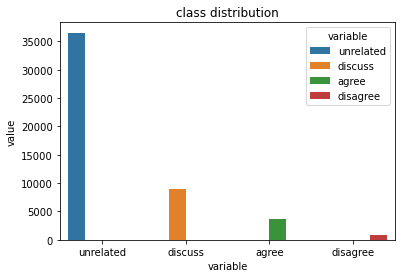

In [4]:
# distribution of labels
class_distribution = (pd.value_counts(df['Stance'])).to_dict() #TODO swap out with  train
print(class_distribution)
sns.barplot(data = pd.DataFrame.from_dict([class_distribution]).melt(), x = "variable", y="value", hue="variable").set_title('class distribution')

3360


Text(0.5, 1.0, 'class distribution')

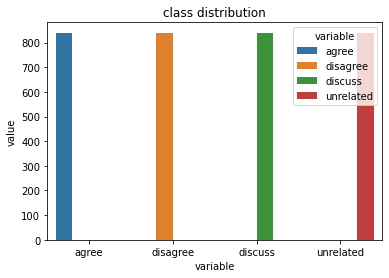

In [16]:
# class_count = [i for i in class_distribution.values()] #TODO swap out with  train 
# class_weights = 1./torch.tensor(class_count , dtype=torch.float)

# print(class_weights)
d = df.groupby('Stance')
d = pd.DataFrame(d.apply(lambda x: x.sample(d.size().min()).reset_index(drop=True)))
print(len(d))

# distribution of labels
class_distribution = (pd.value_counts(d['Stance'])).to_dict()
sns.barplot(data = pd.DataFrame.from_dict([class_distribution]).melt(), x = "variable", y="value", hue="variable").set_title('class distribution')


In [18]:
# lets look at one article in detail
row = d[d['Stance'] == 'agree'].iloc[0]
print(f"{row['head']} \n ----- \n {row['Stance']} \n ----- \n {row['body']}")

Boko Haram claims to have German hostage, denies ceasefire 
 ----- 
 agree 
 ----- 
 MAIDUGURI, Nigeria — The leader of Nigeria’s Islamic extremist group Boko Haram has denied agreeing to any cease-fire with the government and said more than 200 kidnapped schoolgirls all have converted to Islam and been married off.

In a new video released late Friday night, Abubakar Shekau dashed hopes for a prisoner exchange to get the girls released.

“The issue of the girls is long forgotten because I have long ago married them off,” he said, laughing.

“In this war, there is no going back,” he said in the video received by The Associated Press in the same way as previous messages.

Nigeria’s chief of defense staff, Air Chief Marshal Alex Badeh, on Oct. 17 announced that Boko Haram had agreed to an immediate cease-fire to end a 5-year-old insurgency that has killed thousands of people and driven hundreds of thousands from their homes in northeast Nigeria.

But attacks and abductions have continued

In [19]:
d.to_csv('balanced3360.csv')